Entrenamos un perceptron para hacer prediccion de mortalidad

In [1]:
import pandas as pd
df = pd.read_csv('ejemploMI.csv')
df.tail()

,Unnamed: 0,X,exitus,apache2,tipopaciente,sexopac,edad,sofa,lactato
1360,1364,1364,0,24,QU,Hombre,68,5,1.9
1361,1365,1365,0,18,QP,Hombre,55,5,1.5
1362,1366,1366,0,13,QP,Hombre,68,2,4.9
1363,1367,1367,0,10,QU,Hombre,33,1,1.1
1364,1368,1368,0,8,QP,Hombre,64,4,4.8


In [0]:
import matplotlib.pyplot as plt
import numpy as np               # primero un ejemplo sencillo con solo dos variables (apache y lactato)
X = df.iloc[:,[2,3,8]].values    # la variable X tiene los valores de apache2 (columna 3), lactato (columna 8) y exitus (columna 2,variable resultado)

X[:,0] = np.where(X[:,0]==1,-1,1)
#print(X[X[:,0]==0])



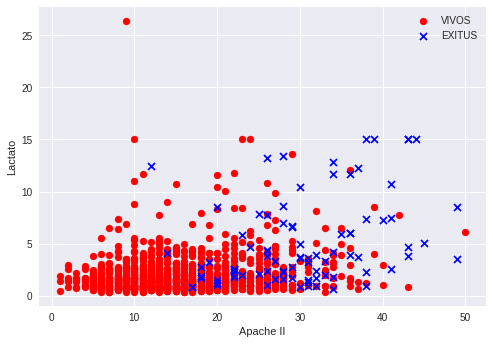

In [3]:
plt.scatter(X[X[:,0]==1,1],X[X[:,0]==1,2],color="red",marker="o",label="VIVOS")
plt.scatter(X[X[:,0]==-1,1],X[X[:,0]==-1,2],color="blue",marker="x",label="EXITUS")
plt.xlabel("Apache II")
plt.ylabel("Lactato")
plt.legend(loc="upper right")
plt.show()

In [4]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

lasX = df.iloc[:,[3,8]]
laY = df.iloc[:,2]
laY = np.where(laY==1,-1,1)

lasX_train,lasX_test,laY_train,laY_test = train_test_split(lasX,laY,test_size=0.3,random_state=11,stratify=df['exitus'].values)

print("Instancias de exitus:" , np.bincount(laY+1))
print("Intancias en train:" , np.bincount(laY_train+1))
print("Instancias en test:" , np.bincount(laY_test+1))


sc = StandardScaler()
sc.fit(lasX_train)
lasX_train_std=sc.transform(lasX_train)
lasX_test_std=sc.transform(lasX_test)


ppn = Perceptron(eta0=0.1,max_iter=40,tol=0.1,random_state=1)
ppn.fit(lasX_train_std,laY_train)

laY_pred = ppn.predict(lasX_test_std)
print('Mal clasificados: %d' % (laY_test!=laY_pred).sum())
print('Bien clasificados: %d' % (laY_test==laY_pred).sum())
print('Exitus predicho: %d' % (-1==laY_pred).sum())
print('Vivo predicho: %d' % (1==laY_pred).sum())


print('Falsos exitus: %d' % ((laY_test==1)&(laY_pred==-1)).sum())
print('Falsos vivos: %d' % ((laY_test==-1)&(laY_pred==1)).sum())

print('Porcentaje de acierto: %.2f' % accuracy_score(laY_test,laY_pred))

Instancias de exitus: [  87    0 1278]
Intancias en train: [ 61   0 894]
Instancias en test: [ 26   0 384]
Mal clasificados: 22
Bien clasificados: 388
Exitus predicho: 8
Vivo predicho: 402
Falsos exitus: 2
Falsos vivos: 20
Porcentaje de acierto: 0.95


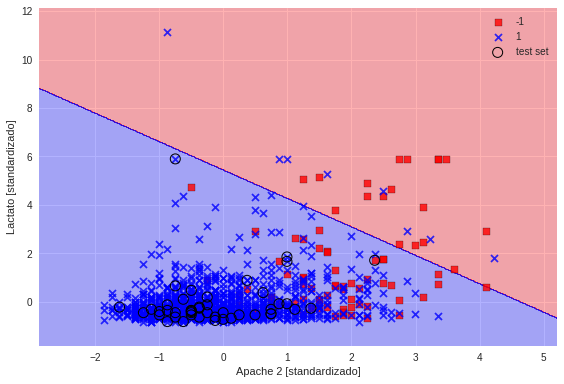

In [5]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


#ahora mostramos graficamente las areas de decision
#definimos una funcion para mostrarlas

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # establecemos marcadores y colores
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # mostramos la superficie de decision
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # destacamos los casos de test
    if test_idx:
        # dibujamos todos
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')




lasX_combined_std = np.vstack((lasX_train_std, lasX_test_std))
laY_combined = np.hstack((laY_train, laY_test))

plot_decision_regions(X=lasX_combined_std, y=laY_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Apache 2 [standardizado]')
plt.ylabel('Lactato [standardizado]')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [13]:
# Ahora añadimos otra variable al perceptron: sofa al ingreso, sin embargo esto no mejora el poder predictivo

lasX2 = df.iloc[:,[3,7,8]]  #sofa esta en la columna 7
laY2 = df.iloc[:,2]
laY2 = np.where(laY==1,-1,1)   

lasX2_train,lasX2_test,laY2_train,laY2_test = train_test_split(lasX2,laY2,test_size=0.3,random_state=1,stratify=df['exitus'].values)

sc = StandardScaler()
sc.fit(lasX2_train)
lasX2_train_std=sc.transform(lasX2_train)
lasX2_test_std=sc.transform(lasX2_test)


ppn2 = Perceptron(eta0=0.1,max_iter=50,tol=0.1,random_state=11)   # cambiamos algo los metaparametros
ppn2.fit(lasX2_train_std,laY2_train)

laY2_pred = ppn2.predict(lasX2_test_std)
print('Mal clasificados: %d' % (laY2_test!=laY2_pred).sum())
print('Bien clasificados: %d' % (laY2_test==laY2_pred).sum())
print('Vivo predicho: %d' % (-1==laY2_pred).sum())
print('Exitus predicho: %d' % (1==laY2_pred).sum())


print('Falsos vivos: %d' % ((laY2_test==1)&(laY2_pred==-1)).sum())
print('Falsos exitus: %d' % ((laY2_test==-1)&(laY2_pred==1)).sum())

print('Porcentaje de acierto: %.2f' % accuracy_score(laY2_test,laY2_pred))

#Podemos usar el perceptron para clasificar nuevos casos
newcases = np.array([[15, 10 ,24] ,[1,0,8]])
print("Casos (lactato, sofa, apache2):" ,newcases,"-> predicciones: ",np.where(ppn2.predict(newcases)==1,"EXITUS","VIVO"))

Mal clasificados: 23
Bien clasificados: 387
Vivo predicho: 407
Exitus predicho: 3
Falsos vivos: 23
Falsos exitus: 0
Porcentaje de acierto: 0.94
Casos (lactato, sofa, apache2): [[15 10 24]
 [ 1  0  8]] -> predicciones:  ['EXITUS' 'VIVO']
